In [13]:
import os
import pandas as pd

def parse_all_xlsx_files(folder_path):
    all_dfs = []

    # Walk through the directory and its subdirectories
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file has a .xlsx extension
            if file.endswith('.xlsx'):
                file_path = os.path.join(root, file)

                # Try to read the Excel file into a DataFrame
                try:
                    df = pd.read_excel(file_path)
                    
                    # Store both the file name and the DataFrame in a tuple
                    result = (file, df)
                    all_dfs.append(result)
                except Exception as e:
                    print(f"Error reading file {file}: {e}")

    return all_dfs

# Specify the folder path containing Excel files
folder_path = 'models'

# Call the function to parse all Excel files in the folder and its subfolders
list_of_dfs = parse_all_xlsx_files(folder_path)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


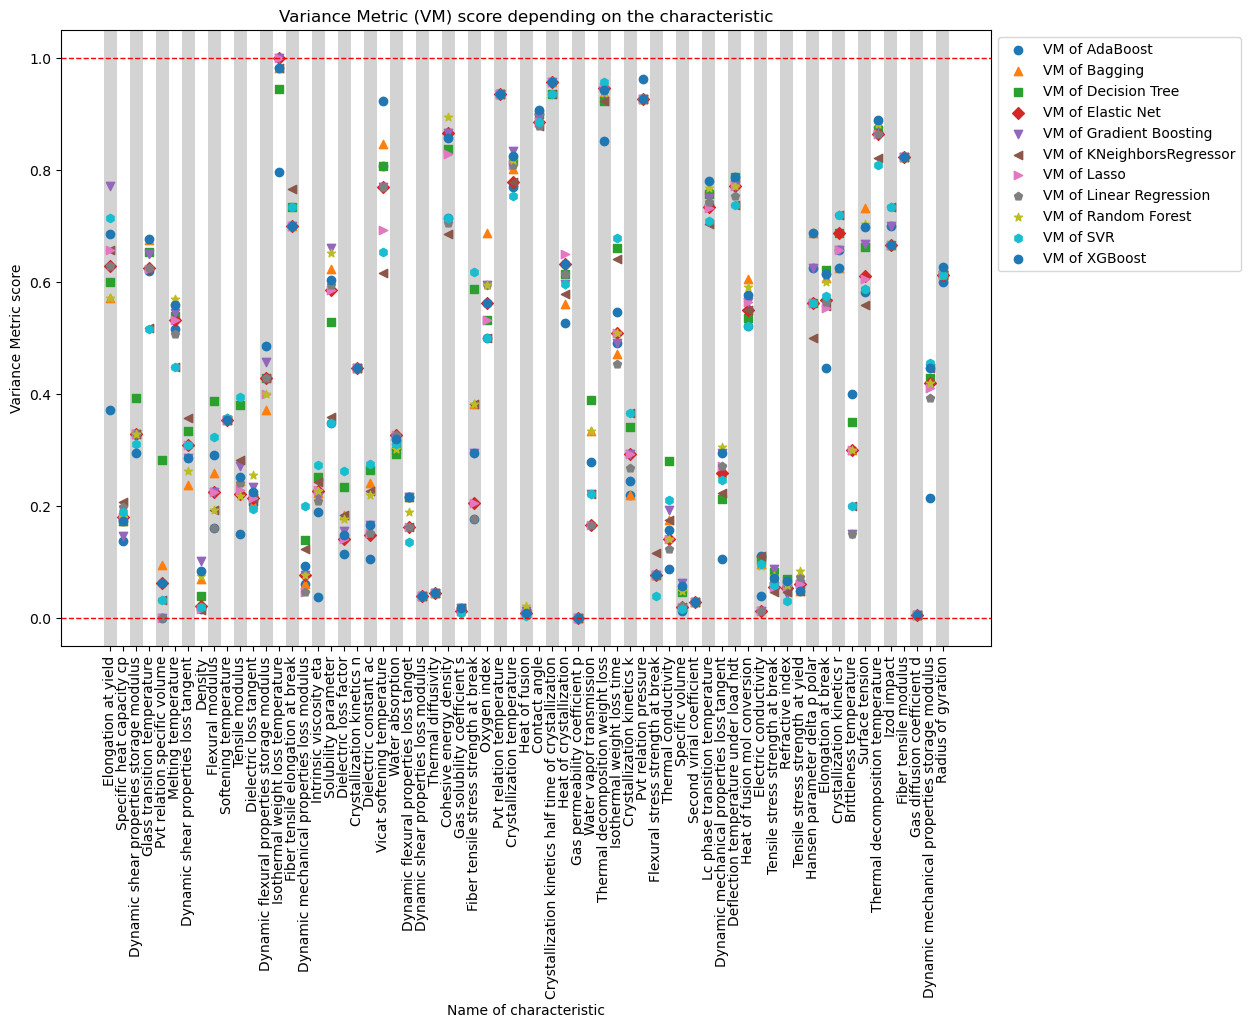

In [13]:
import matplotlib.pyplot as plt

# Define a sequence of markers
markers = ['o', '^', 's', 'D', 'v', '<', '>', 'p', '*', 'h']

# Create an empty list to store legend handles and labels
legend_handles = []

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -0.05  # Set your desired lower limit
    y_axis_upper_limit = 1.05   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['Overall'] >= y_axis_lower_limit) & (df_to_plot['Overall'] <= y_axis_upper_limit)]

    # Set 'Name' column as the index
    filtered_df.set_index('Name', inplace=True)

    # Get the marker for the current plot
    current_marker = markers[d % len(markers)]

    # Create a scatter plot using 'Name' as x-axis labels and the current marker
    scatter = plt.scatter(filtered_df.index, filtered_df['Overall'], label=f'VM of {parsed_entity}', marker=current_marker)

    # Add zebra-like background
    for i, index_name in enumerate(filtered_df.index):
        color = 'lightgray' if i % 2 == 0 else 'white'
        # Adjust the span to cover the entire area between x-axis ticks
        plt.axvspan(i - 0.5, i + 0.5, facecolor=color, alpha=0.3, zorder=-1)

    # Append the scatter plot handle to the legend_handles list
    legend_handles.append(scatter)

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('Variance Metric (VM) score depending on the characteristic')
plt.xlabel('Name of characteristic')
plt.ylabel('Variance Metric score')

# Rotate the figure 90 degrees clockwise
plt.xticks(rotation=90)

# Add legend outside the plot
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

# Save the figure with an explicit bounding box
plt.savefig('VM_all_checked.eps', bbox_inches='tight', format='eps', dpi=300)
# Show the plot
plt.show()

In [14]:
# Initialize an empty dictionary
result_dict = {}

# Iterate through the list_of_dfs
for i in range(len(list_of_dfs)):
    # Extract relevant information
    entity = list_of_dfs[i][0].split('_')[1].split('.')[0]
    names = list_of_dfs[i][1]['Name'].tolist()
    r2_values = list_of_dfs[i][1]['MPE'].tolist()

    # Create a dictionary for each name
    for j in range(len(names)):
        name = names[j]
        r2_value = r2_values[j]

        # If the name is not already a key in result_dict, add it
        if name not in result_dict:
            result_dict[name] = {}

        # Add the entity and its corresponding R2 value to the name's dictionary
        result_dict[name][entity] = r2_value

# Print or use the dictionary as needed
print(result_dict)

{'Thermal conductivity': {'AdaBoost': 274.6851134251215, 'Bagging': 27.16293718711307, 'Decision Tree': 30.2056410971164, 'Elastic Net': 523.07618514004, 'Gradient Boosting': 37.44665552099447, 'KNeighborsRegressor': 77.14452499927133, 'Lasso': 523.07618514004, 'Linear Regression': 9132306659914.848, 'Random Forest': 45.5947209432056, 'SVR': 122.1966307751935, 'XGBoost': 34.4758821048127}, 'Dynamic mechanical properties loss tangent': {'AdaBoost': 1656.223144668726, 'Bagging': 345.6723685207627, 'Decision Tree': 76.94106729604854, 'Elastic Net': 767.8460581358668, 'Gradient Boosting': 308.5012320816782, 'KNeighborsRegressor': 193.7576749525487, 'Lasso': 767.8460581358668, 'Linear Regression': 806893159597039.8, 'Random Forest': 270.7179611626937, 'SVR': 249.6291848729725, 'XGBoost': 181.457457718336}, 'Thermal decomposition temperature': {'AdaBoost': 8.21525739462773, 'Bagging': 3.363775456029029, 'Decision Tree': 2.361809401032059, 'Elastic Net': 5.290218392892728, 'Gradient Boosting'

In [16]:
import pandas as pd

# Create an empty DataFrame to store the results
table_data = {'Charactristic': [], 'Regressor': [], 'MPE': []}
for high_level_key, entity_dict in result_dict.items():
    # Find the lower-level key with the max R2 value
    max_entity = min(entity_dict, key=entity_dict.get)
    max_r2_value = entity_dict[max_entity]

    # Append data to the table_data dictionary
    table_data['Charactristic'].append(high_level_key)
    table_data['Regressor'].append(max_entity)
    table_data['MPE'].append(max_r2_value)

# Create a DataFrame from the table_data
result_table = pd.DataFrame(table_data)

# Display the result_table
result_table

,Charactristic,Regressor,MPE
0,Thermal conductivity,Bagging,27.162937
1,Dynamic mechanical properties loss tangent,Decision Tree,76.941067
2,Thermal decomposition temperature,XGBoost,2.248982
3,Hansen parameter delta-h: hydrogen bonding,XGBoost,2.561384
4,Flexural modulus,Decision Tree,10.428773
...,...,...,...
63,Fiber tensile modulus,SVR,34.779701
64,Crystallization kinetics r,XGBoost,295.333506
65,Contact angle,XGBoost,3.388830
66,Surface tension,Decision Tree,0.055845


In [18]:
result_table_MPE = pd.read_csv('result_table_MPE.csv')
result_table_MPE

,Unnamed: 0,Charactristic,Regressor,MPE
0,0,Thermal conductivity,Bagging,27.162937
1,1,Dynamic mechanical properties loss tangent,Decision Tree,76.941067
2,2,Thermal decomposition temperature,XGBoost,2.248982
3,3,Hansen parameter delta-h: hydrogen bonding,XGBoost,2.561384
4,4,Flexural modulus,Decision Tree,10.428773
...,...,...,...,...
63,63,Fiber tensile modulus,SVR,34.779701
64,64,Crystallization kinetics r,XGBoost,295.333506
65,65,Contact angle,XGBoost,3.388830
66,66,Surface tension,Decision Tree,0.055845


In [23]:
best_MPE = result_table_MPE[result_table_MPE['MPE']<50]
best_MPE

,Unnamed: 0,Charactristic,Regressor,MPE
0,0,Thermal conductivity,Bagging,27.162937
2,2,Thermal decomposition temperature,XGBoost,2.248982
3,3,Hansen parameter delta-h: hydrogen bonding,XGBoost,2.561384
4,4,Flexural modulus,Decision Tree,10.428773
5,5,Vicat softening temperature,Lasso,0.453383
7,7,Pvt relation specific volume,SVR,0.014522
11,11,Lc phase transition temperature,Bagging,3.015693
12,12,Dynamic flexural properties storage modulus,XGBoost,34.925791
13,13,Thermal decomposition weight loss,Decision Tree,14.646020
14,14,Melting temperature,Decision Tree,1.054177


In [35]:
final_1 = pd.read_csv('best_res.csv')
#final_1 = final_1.sort_values(by='Max $R^2$', ascending=False)

In [36]:
final_1

,Unnamed: 0,Charactristic,Regressor,Max $R^2$,NMSE,Data Size_x
0,11,Glass transition temperature,Random Forest,0.88,0.12,8092
1,1,Thermal decomposition temperature,Random Forest,0.73,0.27,6325
2,7,Melting temperature,Random Forest,0.71,0.29,3844
3,17,Intrinsic viscosity eta,Gradient Boosting,0.74,0.26,1978
4,30,Specific volume,XGBoost,0.71,0.29,1739
5,14,Density,XGBoost,0.56,0.44,1739
6,15,Elongation at break,Gradient Boosting,0.55,0.45,1139
7,6,Lc phase transition temperature,Random Forest,0.79,0.21,961
8,28,Softening temperature,Random Forest,0.68,0.32,777
9,23,Refractive index,XGBoost,0.73,0.27,685


In [42]:
final_1 = pd.merge(final_1, best_MPE[['Charactristic', 'MPE']], on='Charactristic', how='left')
final_1

,Unnamed: 0,Charactristic,Regressor,Max $R^2$,NMSE,Data Size_x,MPE_x,MPE_y
0,11,Glass transition temperature,Random Forest,0.88,0.12,8092,1.229773,1.229773
1,1,Thermal decomposition temperature,Random Forest,0.73,0.27,6325,2.248982,2.248982
2,7,Melting temperature,Random Forest,0.71,0.29,3844,1.054177,1.054177
3,17,Intrinsic viscosity eta,Gradient Boosting,0.74,0.26,1978,NaN,NaN
4,30,Specific volume,XGBoost,0.71,0.29,1739,2.750313,2.750313
5,14,Density,XGBoost,0.56,0.44,1739,0.504447,0.504447
6,15,Elongation at break,Gradient Boosting,0.55,0.45,1139,NaN,NaN
7,6,Lc phase transition temperature,Random Forest,0.79,0.21,961,3.015693,3.015693
8,28,Softening temperature,Random Forest,0.68,0.32,777,20.728498,20.728498
9,23,Refractive index,XGBoost,0.73,0.27,685,0.912143,0.912143


In [57]:
#final_1.drop(['NMSE'], axis=1, inplace=True)#to_csv('best_res.csv')

#final_1 = pd.read_excel('best_res.xlsx')
final_1.to_csv('best_res.csv')

In [56]:
final_1['MPE'] = final_1['MPE'].round(2)

In [15]:
vm = result_table[result_table['Max VM'] > 0.5]
vm

,Charactristic,Regressor,Max VM
0,Elongation at yield,Gradient Boosting,0.771429
3,Glass transition temperature,Random Forest,0.677508
5,Melting temperature,Random Forest,0.569194
13,Isothermal weight loss temperature,Elastic Net,1.000000
14,Fiber tensile elongation at break,KNeighborsRegressor,0.766667
17,Solubility parameter,Gradient Boosting,0.660377
21,Vicat softening temperature,Random Forest,0.923077
26,Cohesive energy density,Random Forest,0.895238
28,Fiber tensile stress strength at break,SVR,0.617647
29,Oxygen index,Bagging,0.687500


In [11]:
bests_r2 = pd.read_excel('max_r2.xlsx')

In [14]:
r2 = bests_r2[bests_r2['Max $R^2$']>0.5]
r2

,Unnamed: 0,Charactristic,Regressor,Max $R^2$
1,1,Dynamic mechanical properties loss tangent,Gradient Boosting,0.524970
2,2,Thermal decomposition temperature,Random Forest,0.725618
3,3,Hansen parameter delta-h: hydrogen bonding,AdaBoost,0.588484
5,5,Vicat softening temperature,Gradient Boosting,0.668552
7,7,Pvt relation specific volume,Decision Tree,0.777472
10,10,Water vapor transmission,SVR,0.728422
11,11,Lc phase transition temperature,Random Forest,0.793456
14,14,Melting temperature,Random Forest,0.707474
15,15,Hansen parameter delta p polar,Bagging,0.900058
17,17,Crystallization kinetics k,XGBoost,0.968771


In [16]:
vm_list = list(vm['Charactristic'])
r2_list = list(r2['Charactristic'])

In [17]:
# Находим названия, которые есть в all_cols, но отсутствуют в parts_list
missing_names = set(r2_list) - set(vm_list)

In [18]:
missing_names 

{'Brittleness temperature',
 'Crystallization kinetics k',
 'Density',
 'Dynamic mechanical properties loss tangent',
 'Dynamic shear properties storage modulus',
 'Hansen parameter delta-h: hydrogen bonding',
 'Intrinsic viscosity eta',
 'Pvt relation specific volume',
 'Refractive index',
 'Softening temperature',
 'Specific volume',
 'Thermal diffusivity',
 'Water vapor transmission'}

In [31]:
nonzero_counts = pd.read_excel('non_zero_var.xlsx')

In [32]:
nonzero_counts

,Unnamed: 0,Charactristic,count
0,0,Thermal conductivity,23
1,1,Dynamic mechanical properties loss tangent,216
2,2,Dynamic compressive properties loss tangent,6
3,3,Thermal decomposition temperature,2968
4,4,Compressive stress strength at break,8
...,...,...,...
93,93,Surface tension,176
94,94,Interfacial tension,13
95,95,Specific volume,1063
96,96,Tensile creep compliance,3


In [35]:
final = vm.merge(nonzero_counts.rename(columns={'count': 'count_var'}), on='Charactristic', how='left')
final


,Charactristic,Regressor,Max VM,Unnamed: 0,count_var
0,Elongation at yield,Gradient Boosting,0.771429,29,49
1,Glass transition temperature,Random Forest,0.677508,34,6278
2,Melting temperature,Random Forest,0.569194,24,2182
3,Isothermal weight loss temperature,Elastic Net,1.000000,56,219
4,Fiber tensile elongation at break,KNeighborsRegressor,0.766667,54,31
5,Solubility parameter,Gradient Boosting,0.660377,58,218
6,Vicat softening temperature,Random Forest,0.923077,9,56
7,Cohesive energy density,Random Forest,0.895238,33,219
8,Fiber tensile stress strength at break,SVR,0.617647,62,57
9,Oxygen index,Bagging,0.687500,70,144


In [4]:
final = pd.read_excel('best VM.xlsx')

In [12]:
import pandas as pd
final.to_csv('best VM.csv')

In [7]:
final = final.sort_values(by='Max VM', ascending=False)

In [11]:
final['Max VM'] = final['Max VM'].round(2)

In [80]:
with open('category_dict.json', 'r') as json_file:
    category_dict = json.load(json_file)


In [81]:
category_dict

{'Compression characteristics': ['Compressive modulus',
  'Compressive stress strength at break',
  'Compressive stress strength at yield',
  'Dynamic compressive properties storage modulus',
  'Dynamic compressive properties loss tangent',
  'Dynamic compressive properties loss modulus'],
 'Creep characteristics': ['Tensile creep compliance',
  'Tensile creep modulus',
  'Tensile creep recovery',
  'Tensile creep rupture time',
  'Tensile creep strain',
  'Flexural creep strain',
  'Tensile creep rupture strength'],
 'Dilute solution property': ['Intrinsic viscosity eta',
  'Radius of gyration',
  'Second virial coefficient',
  'Diffusion coefficient',
  'Sedimentation coefficient'],
 'Electric property': ['Dielectric constant ac',
  'Dielectric loss factor',
  'Dielectric loss tangent',
  'Electric conductivity',
  'Surface resistivity',
  'Volume resistivity'],
 'Flexural property': ['Dynamic flexural properties storage modulus',
  'Dynamic flexural properties loss modulus',
  'Dyna

In [77]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Define the sections and their keys in a dictionary
sections = {
    'Section1': {'key1': 'value1', 'key2': 'value2'},
    'Section2': {'key3': 'value3', 'key4': 'value4'},
    'Section3': {'key5': 'value5', 'key6': 'value6'},
}

# Create a Plotly subplot
fig = make_subplots()

# Add the central node 'Polymers'
fig.add_trace(go.Scatter(x=[0], y=[0], text=['Polymers'], mode='text', showlegend=False))

# Add nodes for each section
for i, (section, keys) in enumerate(sections.items(), start=1):
    x = [0.5 * (i % 2) * (-1) ** (i % 2)]  # Alternate sides
    y = [-(i // 2) * 0.2]  # Adjust vertical positions

    # Add a colorful box around each section
    fig.add_shape(
        type='rect',
        xref='x',
        yref='y',
        x0=x[0] - 0.2,
        x1=x[0] + 0.2,
        y0=y[0] - 0.1,
        y1=y[0] + 0.1 * (len(keys) + 1),
        fillcolor=f'rgba({i * 50}, {i * 30}, {i * 20}, 0.5)',
        line=dict(color='black'),
    )

    # Add section name
    fig.add_trace(go.Scatter(x=x, y=y, text=[section], mode='text', showlegend=False))

    # Add keys and values
    for j, (key, value) in enumerate(keys.items(), start=1):
        fig.add_trace(go.Scatter(x=x, y=[y[0] - 0.1 * j], text=[f"{key}: {value}"], mode='text', showlegend=False))

    # Add arrows from 'Polymers' to each section
    fig.add_trace(go.Scatter(
        x=[0, x[0]],
        y=[0, y[0]],
        mode='lines+text',
        text=[f"{key}: {value}" for key, value in keys.items()],
        line=dict(color='black'),
        showlegend=False
    ))

# Update layout for better visualization
fig.update_layout(
    hovermode='closest',
    title='Polymers and Sections',
    showlegend=False,
    margin=dict(b=0, l=0, r=0, t=30),
)

# Show the graph
fig.show()



AttributeError: 'list' object has no attribute 'items'

In [71]:
import json
import plotly.graph_objs as go

# Read JSON file
with open('Category_dict.json', 'r') as file:
    graph_json = json.load(file)

# Create Plotly graph from JSON
fig = go.Figure(graph_json)

# Show the graph
fig.show()


ValueError: Invalid property specified for object of type plotly.graph_objs.Scatter: 'Compression characteristics'

Did you mean "hovertemplatesrc"?

    Valid properties:
        cliponaxis
            Determines whether or not markers and text nodes are
            clipped about the subplot axes. To show markers and
            text nodes above axis lines and tick labels, make sure
            to set `xaxis.layer` and `yaxis.layer` to *below
            traces*.
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the provided data arrays are connected.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.scatter.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.scatter.ErrorY` instance
            or dict with compatible properties
        fill
            Sets the area to fill with a solid color. Defaults to
            "none" unless this trace is stacked, then it gets
            "tonexty" ("tonextx") if `orientation` is "v" ("h") Use
            with `fillcolor` if not "none". "tozerox" and "tozeroy"
            fill to x=0 and y=0 respectively. "tonextx" and
            "tonexty" fill between the endpoints of this trace and
            the endpoints of the trace before it, connecting those
            endpoints with straight lines (to make a stacked area
            graph); if there is no trace before it, they behave
            like "tozerox" and "tozeroy". "toself" connects the
            endpoints of the trace (or each segment of the trace if
            it has gaps) into a closed shape. "tonext" fills the
            space between two traces if one completely encloses the
            other (eg consecutive contour lines), and behaves like
            "toself" if there is no trace before it. "tonext"
            should not be used if one trace does not enclose the
            other. Traces in a `stackgroup` will only fill to (or
            be filled to) other traces in the same group. With
            multiple `stackgroup`s or some traces stacked and some
            not, if fill-linked traces are not already consecutive,
            the later ones will be pushed down in the drawing
            order.
        fillcolor
            Sets the fill color. Defaults to a half-transparent
            variant of the line color, marker color, or marker line
            color, whichever is available.
        fillpattern
            Sets the pattern within the marker.
        groupnorm
            Only relevant when `stackgroup` is used, and only the
            first `groupnorm` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the normalization for the sum of
            this `stackgroup`. With "fraction", the value of each
            trace at each location is divided by the sum of all
            trace values at that location. "percent" is the same
            but multiplied by 100 to show percentages. If there are
            multiple subplots, or multiple `stackgroup`s on one
            subplot, each will be normalized within its own set.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.scatter.Hoverlabel`
            instance or dict with compatible properties
        hoveron
            Do the hover effects highlight individual points
            (markers or line points) or do they highlight filled
            regions? If the fill is "toself" or "tonext" and there
            are no markers or text, then the default is "fills",
            otherwise it is "points".
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.scatter.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        line
            :class:`plotly.graph_objects.scatter.Line` instance or
            dict with compatible properties
        marker
            :class:`plotly.graph_objects.scatter.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        mode
            Determines the drawing mode for this scatter trace. If
            the provided `mode` includes "text" then the `text`
            elements appear at the coordinates. Otherwise, the
            `text` elements appear on hover. If there are less than
            20 points and the trace is not stacked then the default
            is "lines+markers". Otherwise, "lines".
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        orientation
            Only relevant when `stackgroup` is used, and only the
            first `orientation` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the stacking direction. With "v"
            ("h"), the y (x) values of subsequent traces are added.
            Also affects the default value of `fill`.
        selected
            :class:`plotly.graph_objects.scatter.Selected` instance
            or dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stackgaps
            Only relevant when `stackgroup` is used, and only the
            first `stackgaps` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Determines how we handle locations at
            which other traces in this group have data but this one
            does not. With *infer zero* we insert a zero at these
            locations. With "interpolate" we linearly interpolate
            between existing values, and extrapolate a constant
            beyond the existing values.
        stackgroup
            Set several scatter traces (on the same subplot) to the
            same stackgroup in order to add their y values (or
            their x values if `orientation` is "h"). If blank or
            omitted this trace will not be stacked. Stacking also
            turns `fill` on by default, using "tonexty" ("tonextx")
            if `orientation` is "h" ("v") and sets the default
            `mode` to "lines" irrespective of point count. You can
            only stack on a numeric (linear or log) axis. Traces in
            a `stackgroup` will only fill to (or be filled to)
            other traces in the same group. With multiple
            `stackgroup`s or some traces stacked and some not, if
            fill-linked traces are not already consecutive, the
            later ones will be pushed down in the drawing order.
        stream
            :class:`plotly.graph_objects.scatter.Stream` instance
            or dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textfont
            Sets the text font.
        textposition
            Sets the positions of the `text` elements with respects
            to the (x,y) coordinates.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.scatter.Unselected`
            instance or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "hovertemplatesrc"?

Bad property path:
Compression characteristics
^^^^^^^^^^^^^^^^^^^^^^^^^^^